In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
import warnings; warnings.simplefilter('ignore')

#File path
countries_file = 'Country-data.csv'

#Culumns names
countries_columns = ['Name', 'Children mortality', 'Exports', 'Health', 'Imports', 'Income', 'Inflation', 'Life expectancy', 'Total Fertility', 'GDP']

#Uploading file to DataFrame
countries = pd.read_csv(countries_file, sep=',', header=None, names=countries_columns, engine='python')

In [39]:
#Print first 5 dataframe rows
print(countries.head())

#General info about data
print(countries.describe())

#Print amount of null fields from all columns
print(countries.isnull().sum())

#Deleting rows with null fields
countries = countries.dropna()



                  Name  Children mortality  Exports  Health  Imports  Income  \
0          Afghanistan                90.2     10.0    7.58     44.9    1610   
1              Albania                16.6     28.0    6.55     48.6    9930   
2              Algeria                27.3     38.4    4.17     31.4   12900   
3               Angola               119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda                10.3     45.5    6.03     58.9   19100   

   Inflation  Life expectancy  Total Fertility    GDP  
0       9.44             56.2             5.82    553  
1       4.49             76.3             1.65   4090  
2      16.10             76.5             2.89   4460  
3      22.40             60.1             6.16   3530  
4       1.44             76.8             2.13  12200  
       Children mortality     Exports      Health     Imports         Income  \
count          167.000000  167.000000  167.000000  167.000000     167.000000   
mean            38.2700

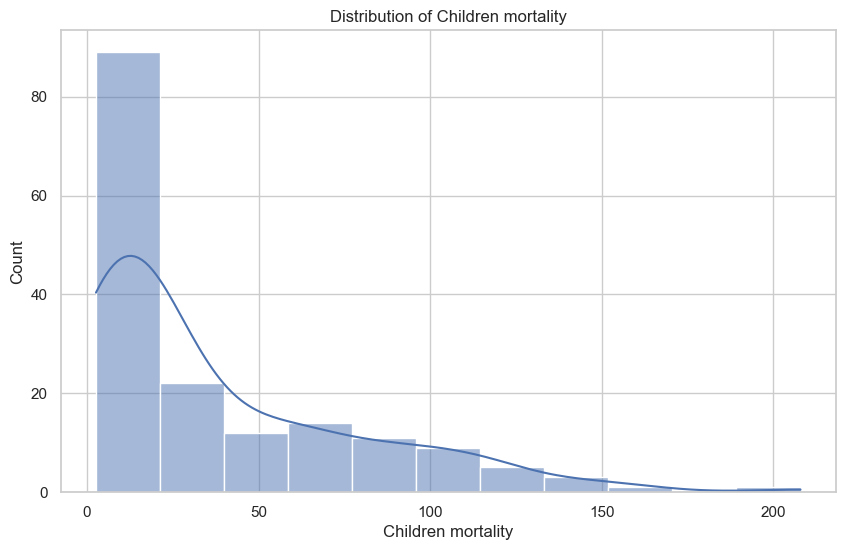

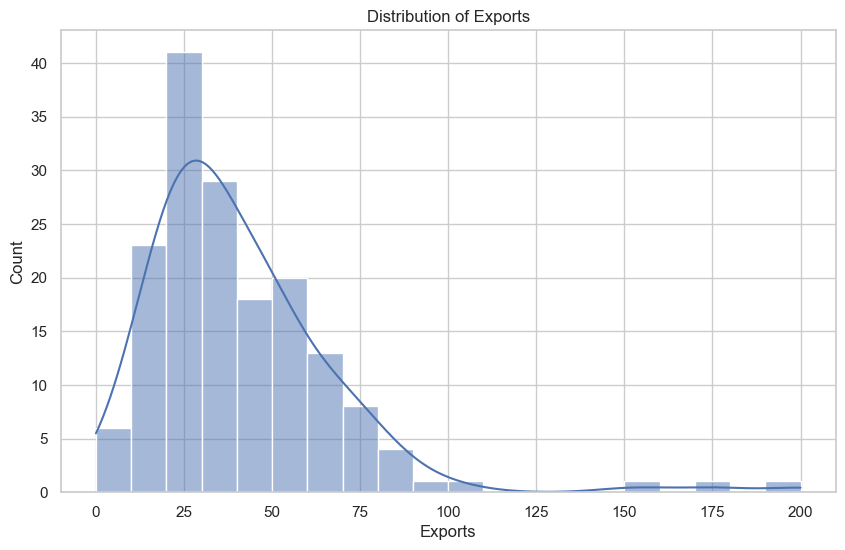

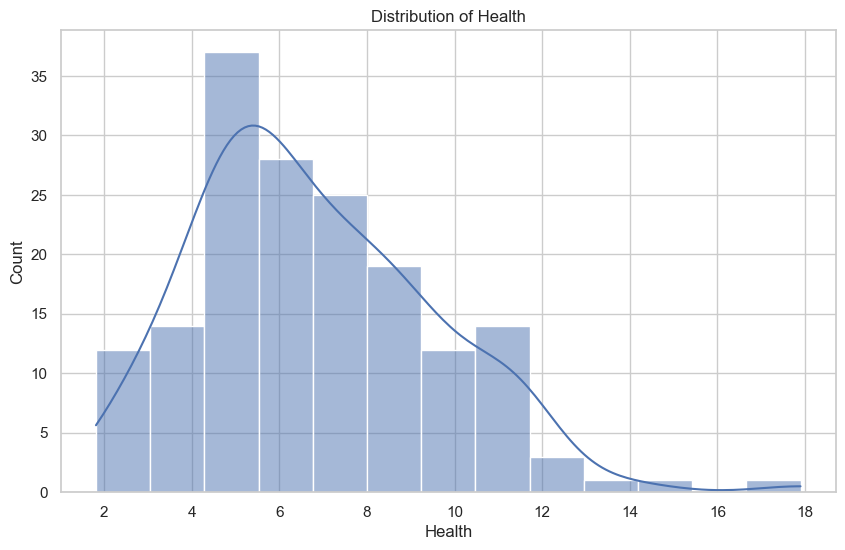

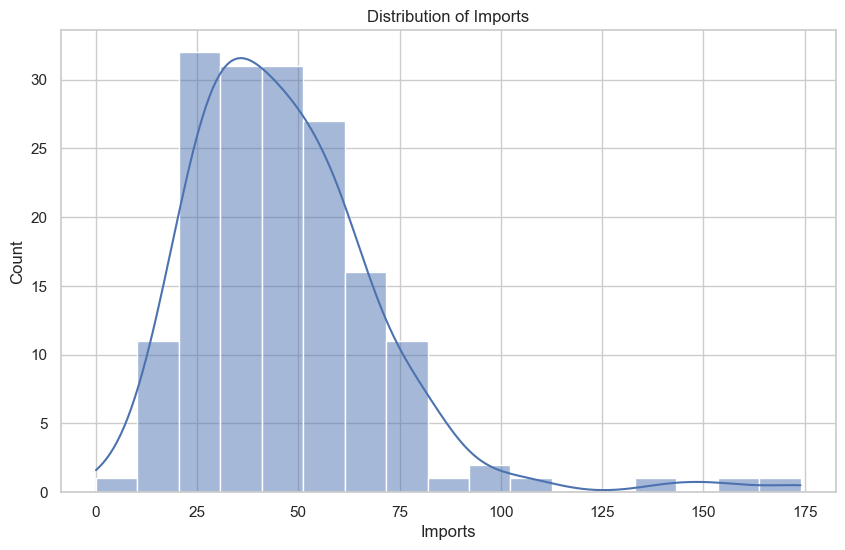

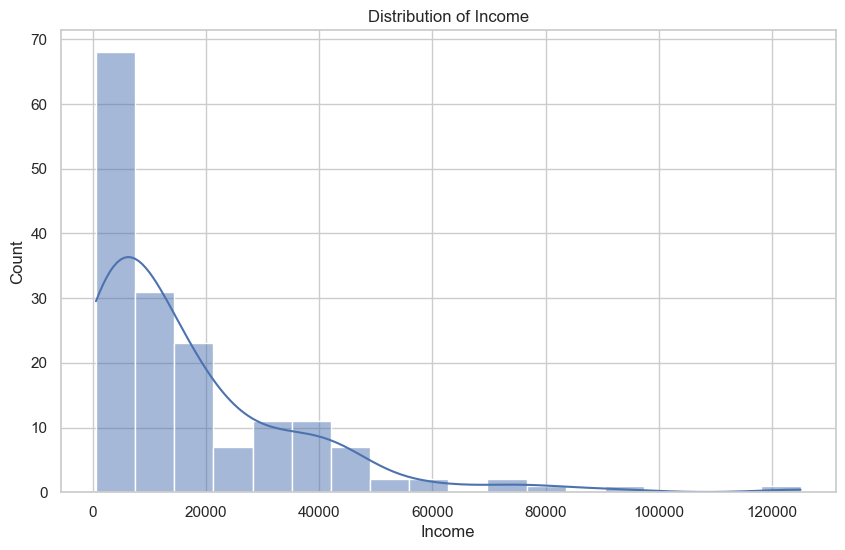

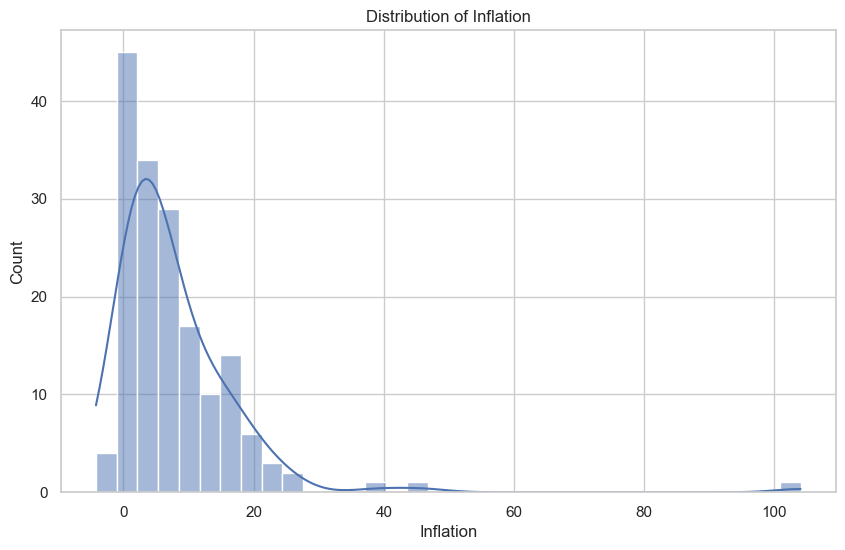

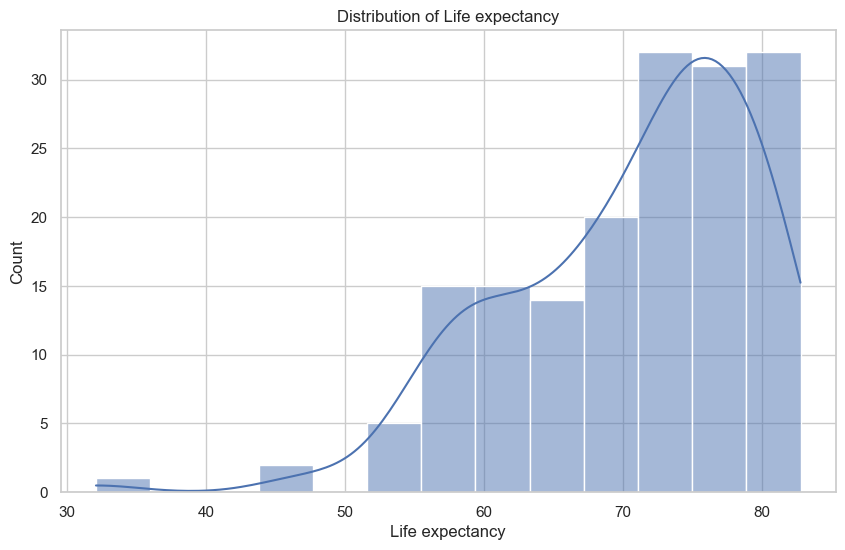

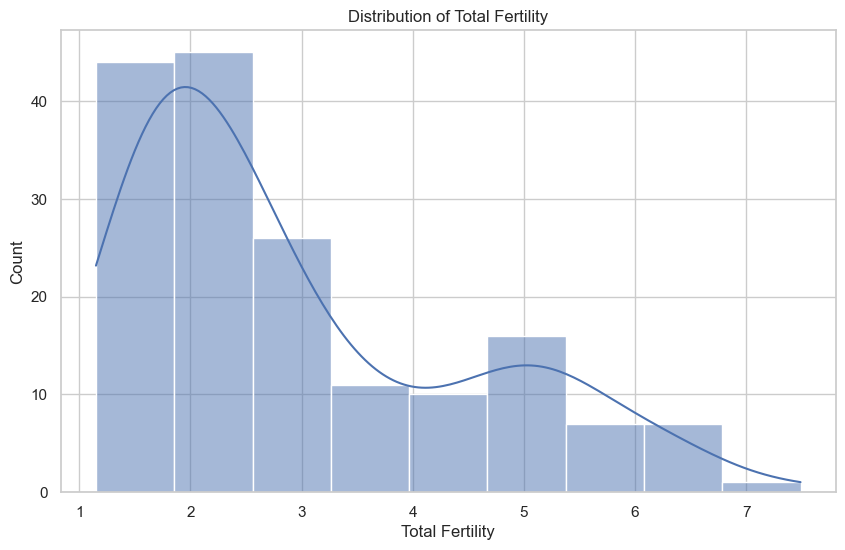

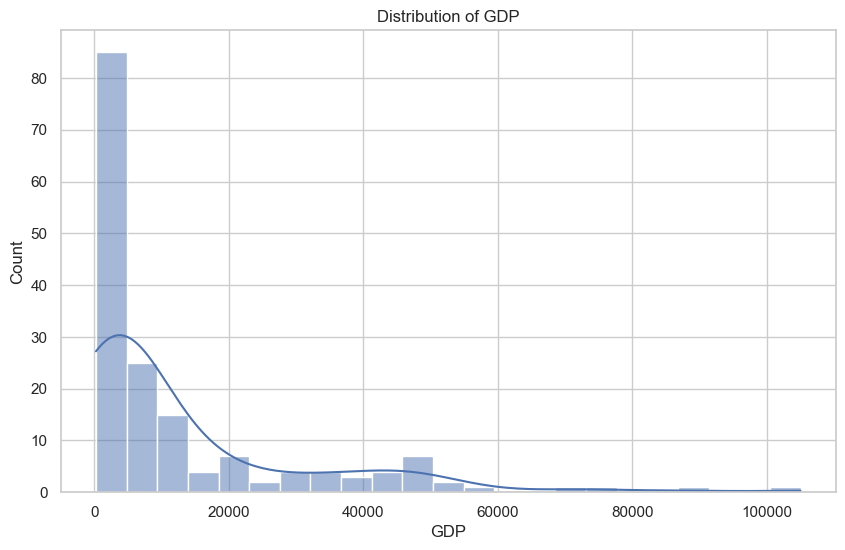

In [40]:
# Однофакторний аналіз

#Graphic style
sns.set(style="whitegrid")

#distribution for each factor
for column in countries_columns[1:]:
    plt.figure(figsize=(10, 6))
    sns.histplot(countries[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


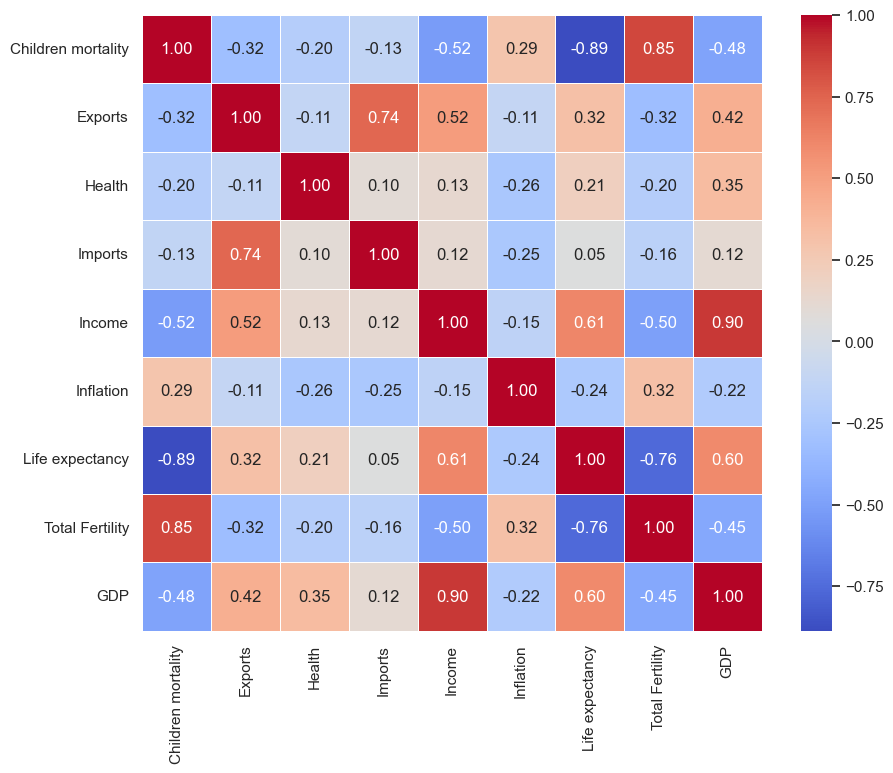

In [41]:
#Кореляційний аналіз

#Setting the size of the graph
plt.figure(figsize=(10, 8))

#Creating a correlation matrix heatmap using seaborn
correlation_matrix = countries[countries_columns[1:]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

#Graphic display
plt.show()

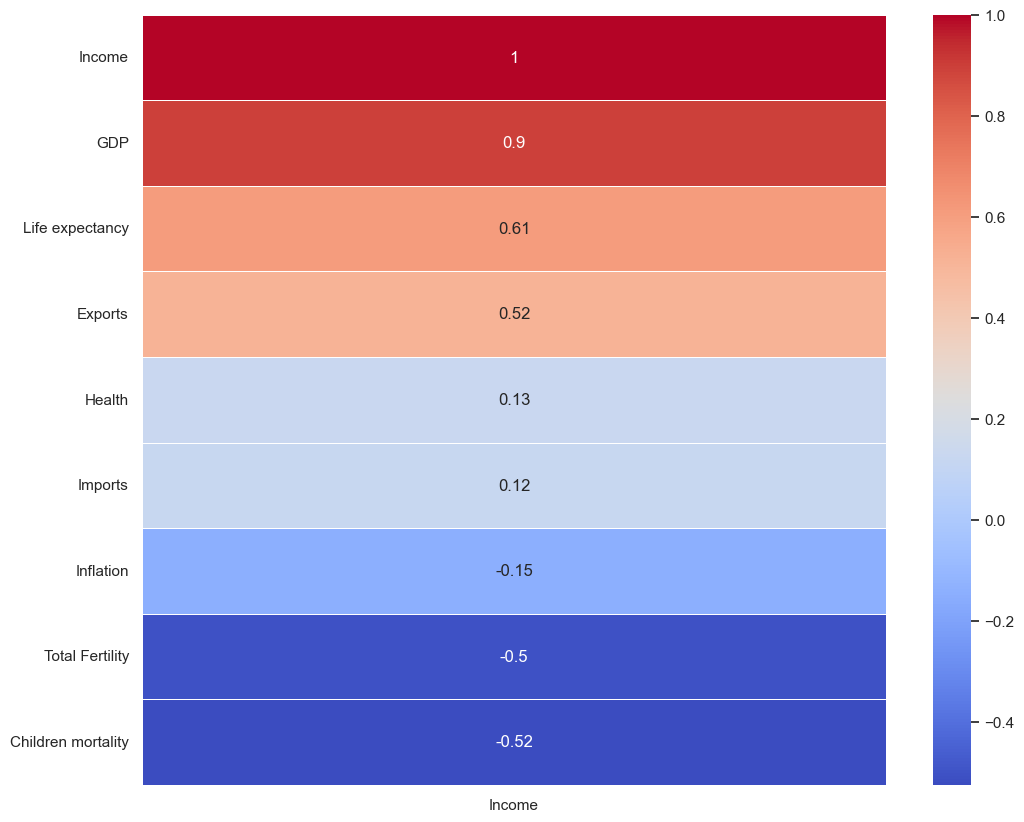

In [42]:
#Вплив факторів на тривалість життя

#The effect of income on life expectancy
correlation_matrix = countries[countries_columns[1:]].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix[['Income']].sort_values(by='Income', ascending=False), annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

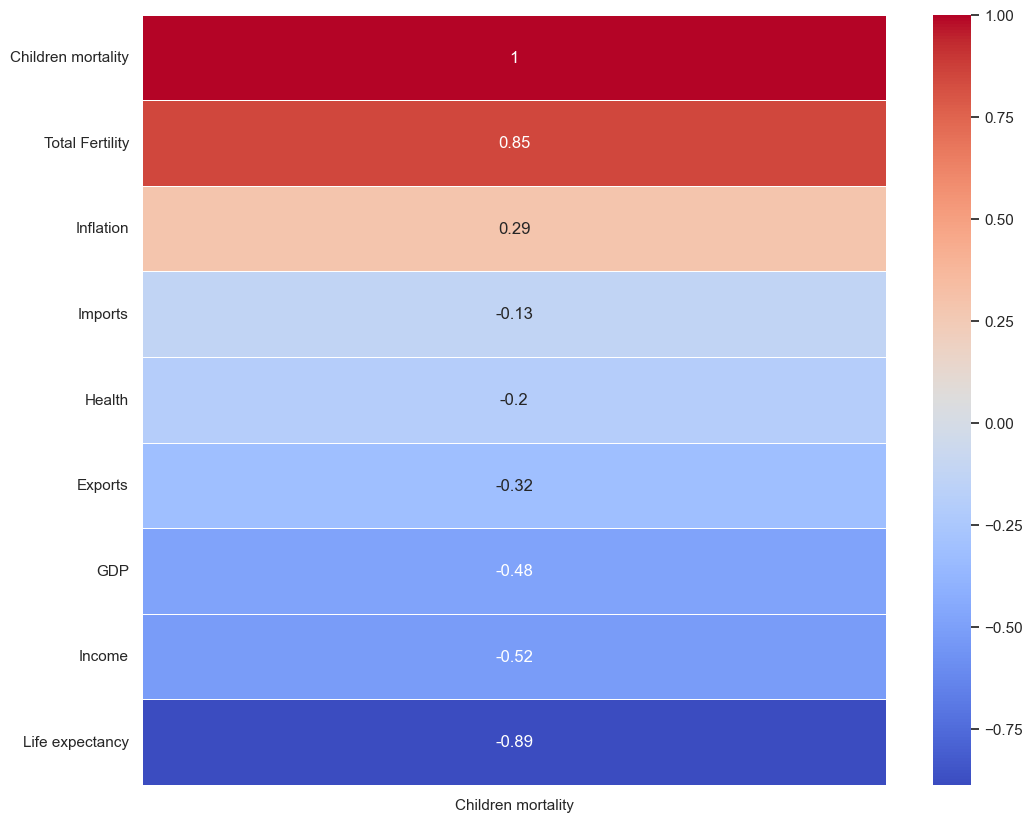

In [43]:
#The impact of child mortality on life expectancy
correlation_matrix = countries[countries_columns[1:]].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix[['Children mortality']].sort_values(by='Children mortality', ascending=False), annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

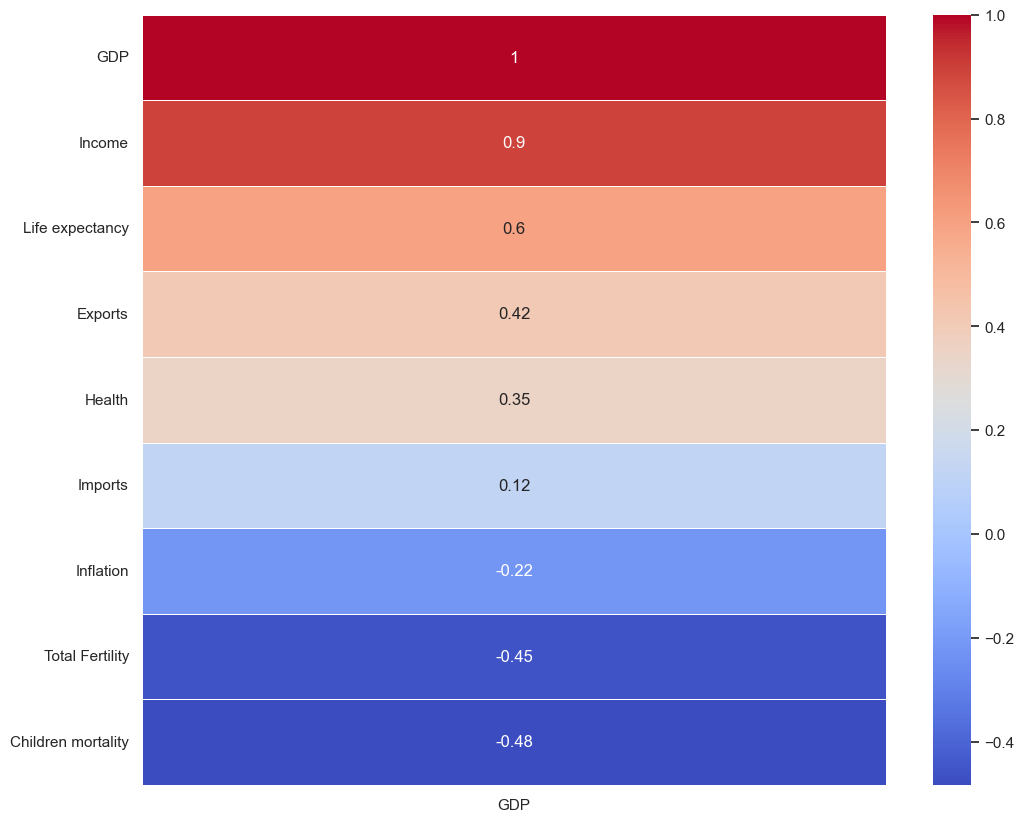

In [44]:
#The impact of GDP on life expectancy
correlation_matrix = countries[countries_columns[1:]].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix[['GDP']].sort_values(by='GDP', ascending=False), annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

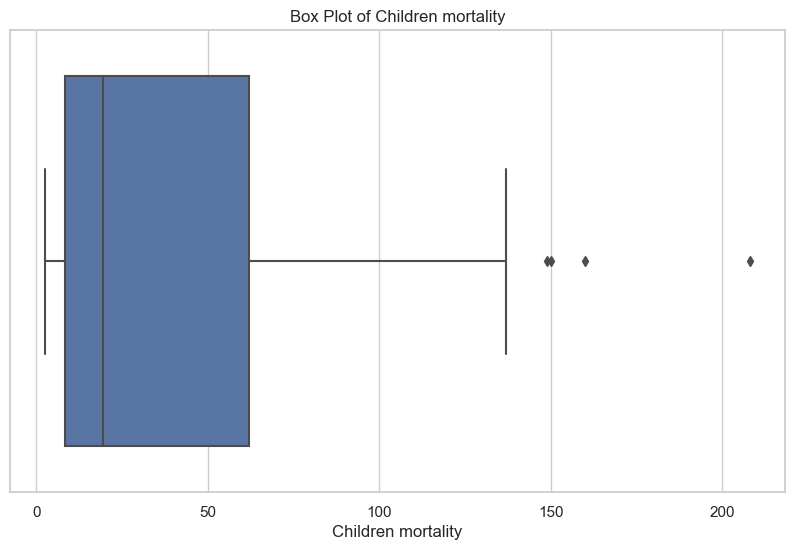

Outliers in Children mortality:
                          Name  Children mortality
31   Central African Republic               149.0
32                       Chad               150.0
66                      Haiti               208.0
132              Sierra Leone               160.0


In [45]:
#Definition of the interquartile range for "Children mortality"
Q1_child = countries['Children mortality'].quantile(0.25)
Q3_child = countries['Children mortality'].quantile(0.75)
IQR_child = Q3_child - Q1_child

#Definition of emissions for "Child mortality"
outliers_child_mortality = (countries['Children mortality'] < (Q1_child - 1.5 * IQR_child)) | (countries['Children mortality'] > (Q3_child + 1.5 * IQR_child))

#Box plot for "Child mortality" without outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=countries['Children mortality'])
plt.title('Box Plot of Children mortality')
plt.show()

#Line output with outliers
print("Outliers in Children mortality:\n", countries.loc[outliers_child_mortality, ['Name', 'Children mortality']])

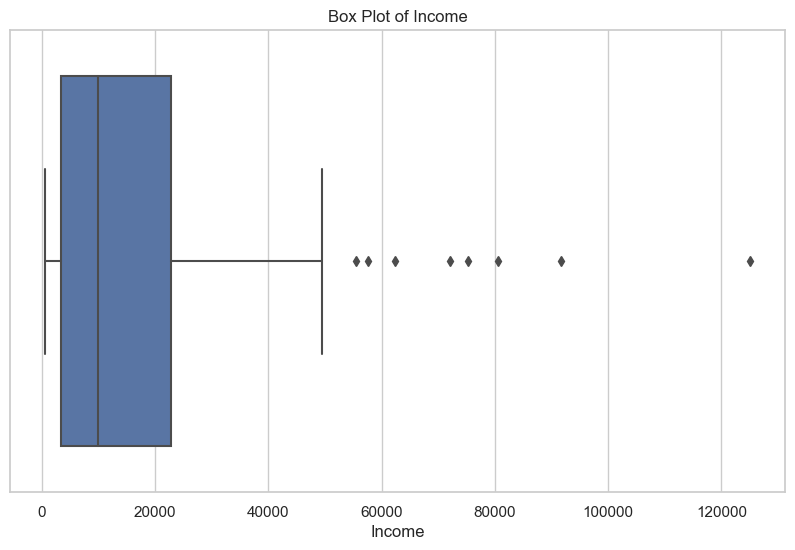

Outliers in Income:
                      Name  Income
23                 Brunei   80600
82                 Kuwait   75200
91             Luxembourg   91700
114                Norway   62300
123                 Qatar  125000
133             Singapore   72100
145           Switzerland   55500
157  United Arab Emirates   57600


In [46]:
#Definition of interquartile range for "Income"
Q1_income = countries['Income'].quantile(0.25)
Q3_income = countries['Income'].quantile(0.75)
IQR_income = Q3_income - Q1_income

#Definition of emissions for "Income"
outliers_income = (countries['Income'] < (Q1_income - 1.5 * IQR_income)) | (countries['Income'] > (Q3_income + 1.5 * IQR_income))

#Box plot for "Income"
plt.figure(figsize=(10, 6))
sns.boxplot(x=countries['Income'])
plt.title('Box Plot of Income')
plt.show()
print("Outliers in Income:\n", countries.loc[outliers_income, ['Name', 'Income']])

In [47]:
# Видалення викидів
countries = countries.loc[~outliers_income]

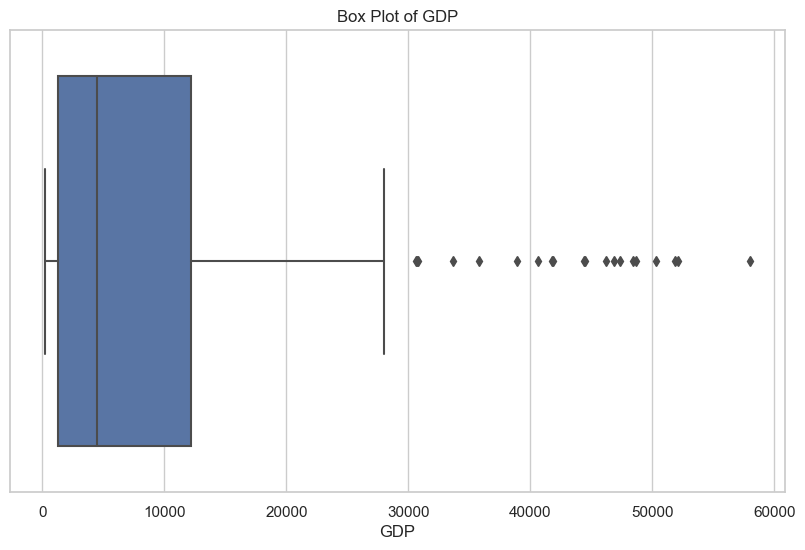

Outliers in GDP:
                Name    GDP
7         Australia  51900
8           Austria  46900
15          Belgium  44400
29           Canada  47400
42           Cyprus  30800
44          Denmark  58000
53          Finland  46200
54           France  40600
58          Germany  41800
68          Iceland  41900
73          Ireland  48700
74           Israel  30600
75            Italy  35800
77            Japan  44500
110     Netherlands  50300
111     New Zealand  33700
139           Spain  30700
144          Sweden  52100
158  United Kingdom  38900
159   United States  48400


In [48]:
#Definition of the interquartile range for "GDP"
Q1_gdp = countries['GDP'].quantile(0.25)
Q3_gdp = countries['GDP'].quantile(0.75)
IQR_gdp = Q3_gdp - Q1_gdp

#Definition of emissions for "GDP"
outliers_gdp = (countries['GDP'] < (Q1_gdp - 1.5 * IQR_gdp)) | (countries['GDP'] > (Q3_gdp + 1.5 * IQR_gdp))

#Box plot for "GDP"
plt.figure(figsize=(10, 6))
sns.boxplot(x=countries['GDP'])
plt.title('Box Plot of GDP')
plt.show()
print("Outliers in GDP:\n", countries.loc[outliers_gdp, ['Name', 'GDP']])

In [49]:
# Видалення викидів
countries = countries.loc[~outliers_gdp]

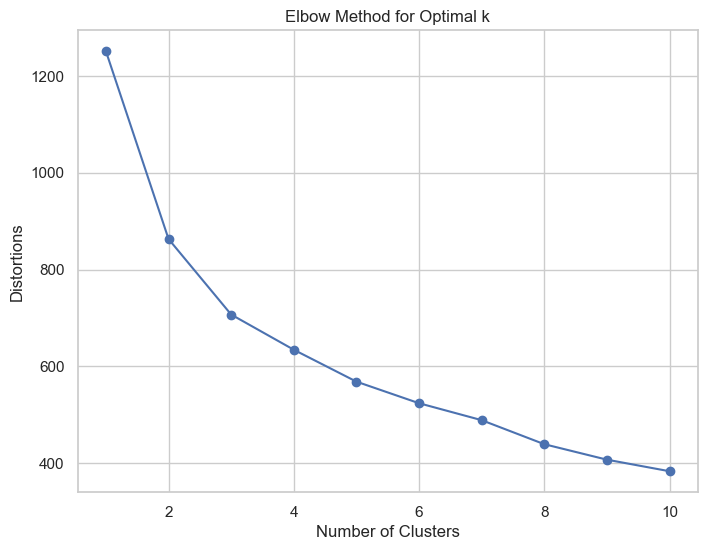

In [50]:
#Separating the numerical columns for clustering
data = countries.drop('Name', axis=1)

#Data standardization
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

#Finding the optimal k using the elbow method
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled)
    distortions.append(kmeans.inertia_)

#Visualization of the elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortions')
plt.show()

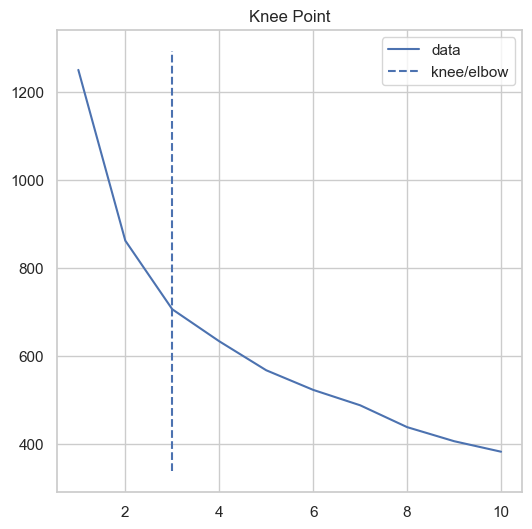

In [51]:
#Determination of the optimal k using kneed
kl = KneeLocator(range(1, 11), distortions, curve='convex', direction='decreasing')
optimal_k = kl.elbow
kl.plot_knee()
plt.show()

#Clustering with optimal k
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
countries['Cluster'] = kmeans_optimal.fit_predict(data_scaled)

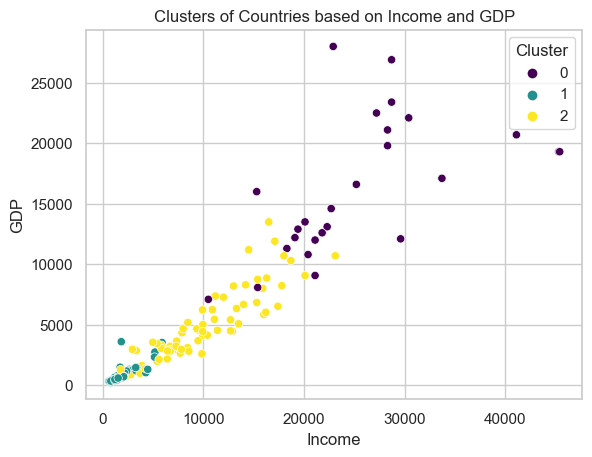

In [52]:
#Visualization of clustering results for Income and GDP
sns.scatterplot(x='Income', y='GDP', hue='Cluster', data=countries, palette='viridis')
plt.title('Clusters of Countries based on Income and GDP')
plt.xlabel('Income')
plt.ylabel('GDP')
plt.show()

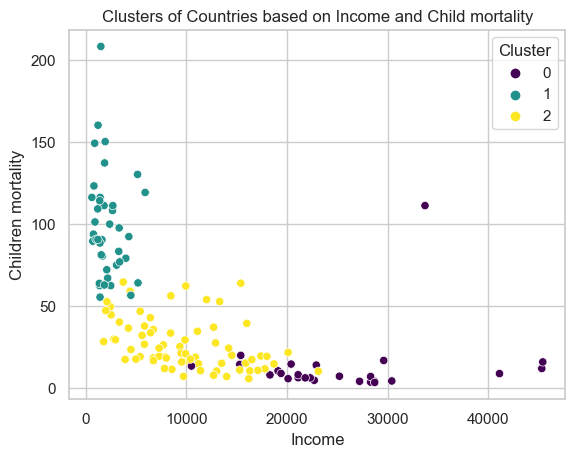

In [53]:
#Visualization of clustering results for Income and Children mortality
sns.scatterplot(x='Income', y='Children mortality', hue='Cluster', data=countries, palette='viridis')
plt.title('Clusters of Countries based on Income and Child mortality')
plt.xlabel('Income')
plt.ylabel('Children mortality')
plt.show()

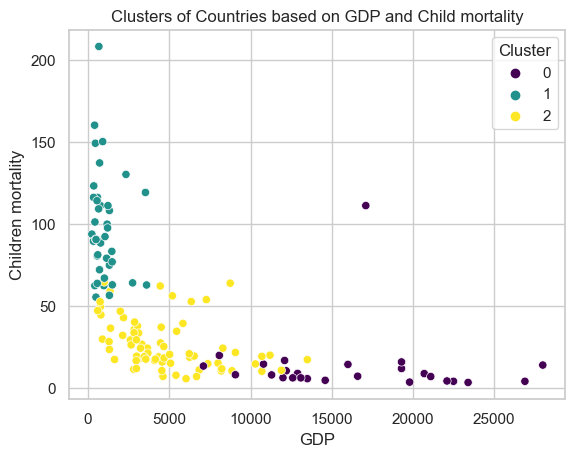

In [54]:
#Visualization of clustering results for GDP and Children mortality
sns.scatterplot(x='GDP', y='Children mortality', hue='Cluster', data=countries, palette='viridis')
plt.title('Clusters of Countries based on GDP and Child mortality')
plt.xlabel('GDP')
plt.ylabel('Children mortality')
plt.show()

In [55]:
#Output of the table with clustering results
cluster_table = countries[['Name', 'GDP', 'Income', 'Children mortality', 'Cluster']]
cluster_table.sort_values(by='Children mortality', ascending=False, inplace=True)
print(cluster_table)

                         Name    GDP  Income  Children mortality  Cluster
66                      Haiti    662    1500               208.0        1
132              Sierra Leone    399    1220               160.0        1
32                       Chad    897    1930               150.0        1
31   Central African Republic    446     888               149.0        1
97                       Mali    708    1870               137.0        1
..                        ...    ...     ...                 ...      ...
138               South Korea  22100   30400                 4.1        0
122                  Portugal  22500   27200                 3.9        0
60                     Greece  26900   28700                 3.9        0
43             Czech Republic  19800   28300                 3.4        0
135                  Slovenia  23400   28700                 3.2        0

[139 rows x 5 columns]


In [56]:
#Let's filter the table for cluster 1
cluster_1_table = cluster_table[cluster_table['Cluster'] == 1]

#Let's display the result 
print(cluster_1_table.head(5))

                         Name  GDP  Income  Children mortality  Cluster
66                      Haiti  662    1500               208.0        1
132              Sierra Leone  399    1220               160.0        1
32                       Chad  897    1930               150.0        1
31   Central African Republic  446     888               149.0        1
97                       Mali  708    1870               137.0        1
